# Create MP2RAGE Image

In [31]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import nibabel as nib
from mp2rage.utils import MP2RAGE

## Load data

In [32]:
# Load dataset paths
subject = '334264'
scan = '401-x-WIPMP2RAGE_0p7mm_1sTI_best_oneSENSE-x-WIPMP2RAGE_0p7mm_1sTI_best_oneSENSE'
scan_num = '401'
scan_times = ['1010', '3310']
dataset_path = '/nfs/masi/saundam1/outputs/mp2rage_converted_v2023/'
subject_path = os.path.join(dataset_path, subject, scan)

# Load NIFTI files
inv1_real = nib.load(os.path.join(subject_path, f'{scan_num}_real_t{scan_times[0]}.nii'))
inv1_imag = nib.load(os.path.join(subject_path, f'{scan_num}_imaginary_t{scan_times[0]}.nii'))
inv2_real = nib.load(os.path.join(subject_path, f'{scan_num}_real_t{scan_times[1]}.nii'))
inv2_imag = nib.load(os.path.join(subject_path, f'{scan_num}_imaginary_t{scan_times[1]}.nii'))

# Load data from NIFTI
inv1_real_data = inv1_real.get_fdata()
inv1_imag_data = inv1_imag.get_fdata()
inv2_real_data = inv2_real.get_fdata()
inv2_imag_data = inv2_imag.get_fdata()

## Calculate MP2RAGE image

In [37]:
# Create combined complex data
inv1_data = inv1_real_data + 1j*inv1_imag_data
inv2_data = inv2_real_data + 1j*inv2_imag+data

# Calculate MP2RAGE image
mp2rage = MP2RAGE(inv1_data, inv2_data)
mp2rage_nifti = nib.nifti2.Nifti2Image(mp2rage, inv1_real.affine)

[[[-257.5-257.5j -257.5-257.5j -257.5-257.5j ... -257.5-257.5j
   -257.5-257.5j -257.5-257.5j]
  [-257.5-257.5j -257.5-257.5j -257.5-257.5j ... -257.5-257.5j
   -257.5-257.5j -257.5-257.5j]
  [-257.5-257.5j -257.5-257.5j -257.5-257.5j ... -257.5-257.5j
   -257.5-257.5j -257.5-257.5j]
  ...
  [-257.5-257.5j -257.5-257.5j -257.5-257.5j ... -257.5-257.5j
   -257.5-257.5j -257.5-257.5j]
  [-257.5-257.5j -257.5-257.5j -257.5-257.5j ... -257.5-257.5j
   -257.5-257.5j -257.5-257.5j]
  [-257.5-257.5j -257.5-257.5j -257.5-257.5j ... -257.5-257.5j
   -257.5-257.5j -257.5-257.5j]]

 [[-257.5-257.5j -257.5-257.5j -257.5-257.5j ... -257.5-257.5j
   -257.5-257.5j -257.5-257.5j]
  [-257.5-257.5j -257.5-257.5j -257.5-257.5j ... -257.5-257.5j
   -257.5-257.5j -257.5-257.5j]
  [-257.5-257.5j -257.5-257.5j -257.5-257.5j ... -257.5-257.5j
   -257.5-257.5j -257.5-257.5j]
  ...
  [-257.5-257.5j -257.5-257.5j -257.5-257.5j ... -257.5-257.5j
   -257.5-257.5j -257.5-257.5j]
  [-257.5-257.5j -257.5-257.5j -257.

## Save results

In [39]:
# Save to file
output_file = os.path.join('outputs', f'example_mp2rage.nii.gz')
nib.save(mp2rage_nifti, output_file)

## Plot results

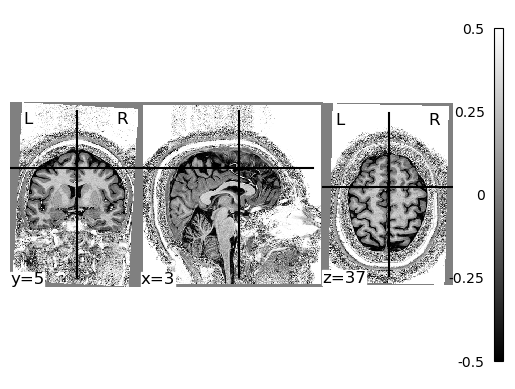

In [40]:
# Plot results
fig, ax = plt.subplots()
img = plotting.plot_img(mp2rage_nifti, cmap='gray', axes=ax, vmin=-0.5, vmax=0.5, colorbar=True)